In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.model_selection import GridSearchCV, train_test_split
import seaborn as sns

## 1. Data



In [2]:
X_train = pd.read_csv('../data/X_train.csv')
y_train = pd.read_csv('../data/y_train.csv')
X_test = pd.read_csv('../data/X_test.csv')

In [3]:
n_samples, n_features = X_train.shape
print('Les données d\'entraînement contiennent : {} échantillons de dimension {}'.format(n_samples, n_features))
print('Les données de test contiennent : {} échantillons de dimension {}'.format(X_test.shape[0], X_test.shape[1]))

Les données d'entraînement contiennent : 1494 échantillons de dimension 35
Les données de test contiennent : 654 échantillons de dimension 35


In [4]:
print(X_train.sort_values("DAY_ID"))



        ID  DAY_ID COUNTRY  DE_CONSUMPTION  FR_CONSUMPTION  DE_FR_EXCHANGE  \
742   1057       0      FR        0.048418       -0.465067       -0.079296   
1211  1179       1      FR        0.966997        1.222131        0.331356   
1408  1327       2      FR       -0.068972       -0.667390       -1.102015   
1468   111       2      DE       -0.068972       -0.667390       -1.102015   
329   2016       3      FR       -0.134670       -0.834564       -1.051716   
...    ...     ...     ...             ...             ...             ...   
1007  1987    1212      FR       -0.046100       -0.520506       -0.270515   
986    771    1212      DE       -0.046100       -0.520506       -0.270515   
1465   472    1213      DE        1.407027        1.313254       -0.456126   
873   1688    1213      FR        1.407027        1.313254       -0.456126   
1437  1049    1215      FR        0.544810       -0.378158       -0.065993   

      FR_DE_EXCHANGE  DE_NET_EXPORT  FR_NET_EXPORT  DE_NET_IMPO

In [5]:
print(X_test.sort_values("DAY_ID"))




       ID  DAY_ID COUNTRY  DE_CONSUMPTION  FR_CONSUMPTION  DE_FR_EXCHANGE  \
446  1626       4      FR        0.944117        0.203547        0.372743   
231   410       4      DE        0.944117        0.203547        0.372743   
120  1778       6      FR        0.120788       -0.744840       -1.195940   
570   562       6      DE        0.120788       -0.744840       -1.195940   
491  1966       9      FR        1.056973        0.535641        0.989874   
..    ...     ...     ...             ...             ...             ...   
89   1668    1210      FR        1.741160        1.823518        1.588180   
556   452    1210      DE        1.741160        1.823518        1.588180   
341  1486    1211      FR       -0.260011       -1.022730       -1.208286   
321   270    1211      DE       -0.260011       -1.022730       -1.208286   
1    1202    1214      FR        0.803209        0.780411        0.601610   

     FR_DE_EXCHANGE  DE_NET_EXPORT  FR_NET_EXPORT  DE_NET_IMPORT  ...  \
44

la temporalité n'est pas respecté

### Description des données

In [6]:
with pd.option_context('display.max_columns', None):
    display(X_train.head())

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,FR_NET_IMPORT,DE_GAS,FR_GAS,DE_COAL,FR_COAL,DE_HYDRO,FR_HYDRO,DE_NUCLEAR,FR_NUCLEAR,DE_SOLAR,FR_SOLAR,DE_WINDPOW,FR_WINDPOW,DE_LIGNITE,DE_RESIDUAL_LOAD,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
0,1054,206,FR,0.210099,-0.427458,-0.606523,0.606523,NaN,0.692860,NaN,-0.692860,0.441238,-0.213766,0.740627,0.288782,2.209047,0.207838,0.709614,-0.190463,0.101766,1.248911,-0.573370,-0.269460,0.870344,0.626666,-0.444661,-0.172680,-0.556356,-0.790823,-0.283160,-1.069070,-0.063404,0.339041,0.124552,-0.002445
1,2049,501,FR,-0.022399,-1.003452,-0.022063,0.022063,-0.573520,-1.130838,0.573520,1.130838,0.174773,0.426940,-0.170392,-0.762153,0.187964,-0.807112,-1.882740,-2.185961,1.987428,3.237380,-0.035514,-0.107350,-0.194308,-0.395469,-1.183194,-1.240300,-0.770457,1.522331,0.828412,0.437419,1.831241,-0.659091,0.047114,-0.490365
2,1924,687,FR,1.395035,1.978665,1.021305,-1.021305,-0.622021,-1.682587,0.622021,1.682587,2.351913,2.122241,1.572267,0.777053,-0.108578,0.779142,-1.897109,0.735137,-1.115583,-0.371039,-0.298755,-0.141239,0.428272,1.336625,1.947273,-0.480700,-0.313338,0.431134,0.487608,0.684884,0.114836,0.535974,0.743338,0.204952
3,297,720,DE,-0.983324,-0.849198,-0.839586,0.839586,-0.270870,0.563230,0.270870,-0.563230,0.487818,0.194659,-1.473817,-0.786025,-0.368417,1.320483,-0.205547,-1.589554,1.751523,0.562944,-0.010090,0.366885,-2.330557,-1.191889,-0.976974,-1.114838,-0.507570,-0.499409,-0.236249,0.350938,-0.417514,0.911652,-0.296168,1.073948
4,1101,818,FR,0.143807,-0.617038,-0.924990,0.924990,NaN,0.990324,NaN,-0.990324,0.238693,-0.240862,1.003734,-0.274975,-0.230179,-0.795983,-0.005581,0.176935,0.693543,0.723587,-0.774941,-0.564498,0.691040,0.571613,-0.526267,-0.541465,-0.424550,-1.088158,-1.011560,0.614338,0.729495,0.245109,1.526606,2.614378


In [7]:
y_train.head()

,ID,TARGET
0,1054,0.028313
1,2049,-0.112516
2,1924,-0.180840
3,297,-0.260356
4,1101,-0.071733


Les données d'entrée possèdent 35 colonnes :

- ID : Identifiant d'indexe unique, associé à un jour (DAY_ID) et un pays (COUNTRY),
- DAY_ID : Identifiant du jour - les dates ont été annonymisées en préservant la structure des données,
- COUNTRY : Identifiant du pays - DE = Allemagne, FR = France, 

et composées ensuite de variations journalières du prix de matières premières,

- GAS_RET : Gaz en Europe,
- COAL_RET : Charbon en Europe,
- CARBON_RET : Futures sur les emissions carbone, 

de mesures météorologiques (journalières, dans le pays x),

- x_TEMP : Temperature,
- x_RAIN : Pluie,
- x_WIND : Vent,

de mesures de productions d'energie (journalière, dans le pays x),

- x_GAS : Gaz naturel,
- x_COAL : Charbon,
- x_HYDRO : Hydrolique,
- x_NUCLEAR : Nucléaire,
- x_SOLAR : Photovoltaïque,
- x_WINDPOW : Eolienne,
- x_LIGNITE : Lignite,

et de mesures d'utilisation électrique (journalières, dans le pays x),

- x_CONSUMPTON : Electricité totale consommée,
- x_RESIDUAL_LOAD : Electricité consommée après utilisation des énergies renouvelables,
- x_NET_IMPORT: Electricité importée depuis l'Europe,
- x_NET_EXPORT: Electricité exportée vers l'Europe,
- DE_FR_EXCHANGE: Electricité échangée entre Allemagne et France,
- FR_DE_EXCHANGE: Electricité échangée entre France et Allemagne.



#### Commentaires:
- Dans le benchmarck FR et DE sont traités de la même facon. Vaut-il mieux les traiter séparamment.
- Si nous construisons deux modèles distincts, alors le dataset perdra considérablement en terme de qualité. En effet nous diviserons presque par deux le nombre d'observations pour chaque modèle
- Il faudrait donc améliorer le jeu de données pour pouvoir construire un unique modèle de prédiction qualitatif.

In [8]:
X_train["DAY_ID"].value_counts().head(1000)


DAY_ID
77      2
237     2
231     2
1001    2
1070    2
       ..
0       1
308     1
721     1
969     1
90      1
Name: count, Length: 851, dtype: int64

In [9]:
day_ids = [77, 237, 231, 1001, 1070, 1112, 908, 757, 542, 391]

X_train[X_train["DAY_ID"].isin(day_ids)].sort_values("DAY_ID")


,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
492,1278,77,FR,0.204839,-0.556874,-0.868887,0.868887,-0.923998,0.858085,0.923998,...,-0.606544,-1.316356,-0.173395,-0.419634,-0.195610,-1.597233,-0.701258,-1.394954,-0.403791,-0.316186
852,62,77,DE,0.204839,-0.556874,-0.868887,0.868887,-0.923998,0.858085,0.923998,...,-0.606544,-1.316356,-0.173395,-0.419634,-0.195610,-1.597233,-0.701258,-1.394954,-0.403791,-0.316186
550,2060,231,FR,-0.511138,-0.802438,0.938683,-0.938683,-0.723702,-2.174215,0.723702,...,-0.779227,-1.516457,-0.478945,0.909630,0.100861,0.171330,0.453644,-0.664758,-0.189012,-0.667172
1212,844,231,DE,-0.511138,-0.802438,0.938683,-0.938683,-0.723702,-2.174215,0.723702,...,-0.779227,-1.516457,-0.478945,0.909630,0.100861,0.171330,0.453644,-0.664758,-0.189012,-0.667172
561,1363,237,FR,0.664205,0.326647,-0.213652,0.213652,-0.027239,-0.462336,0.027239,...,0.349165,0.045906,-0.739773,-0.849181,-0.669926,-0.193674,-0.369820,0.444776,-0.193880,0.318229
567,147,237,DE,0.664205,0.326647,-0.213652,0.213652,-0.027239,-0.462336,0.027239,...,0.349165,0.045906,-0.739773,-0.849181,-0.669926,-0.193674,-0.369820,0.444776,-0.193880,0.318229
560,2050,391,FR,-0.305770,-0.818128,0.397849,-0.397849,-0.299681,-1.494674,0.299681,...,-0.997108,-0.450657,-0.108242,1.390915,1.370472,-0.380167,0.859136,-1.033335,0.604034,-1.409869
1364,834,391,DE,-0.305770,-0.818128,0.397849,-0.397849,-0.299681,-1.494674,0.299681,...,-0.997108,-0.450657,-0.108242,1.390915,1.370472,-0.380167,0.859136,-1.033335,0.604034,-1.409869
559,646,542,DE,1.166555,-0.318736,-0.243236,0.243236,0.976377,0.877926,-0.976377,...,-1.091336,-0.420718,-0.471684,2.543151,3.499060,1.297569,1.306755,-0.371456,2.309202,0.717430
960,1862,542,FR,1.166555,-0.318736,-0.243236,0.243236,0.976377,0.877926,-0.976377,...,-1.091336,-0.420718,-0.471684,2.543151,3.499060,1.297569,1.306755,-0.371456,2.309202,0.717430


In [10]:
y_train.loc[[1278, 62]]

,ID,TARGET
1278,878,-0.444789
62,1560,-0.532471


#### Commentaires 
- On observe que les features de certaines dates sont utilisés deux fois dans le dataset : une fois pour décrire la Variation du prix de l'électricté en France, et l'autre fois pour décrire celle en Allemagne
- On observe aussi que les même feautures  ont des impacts totalement différents sur la variation du prix de l'éléctricité en Allemagne ou en France. Il serait donc judicieux de bien préparer le set de données avant de passer à la modélisation.
- Une solution serait de modifier COUNTRY en une variable binaire prenant des valeurs {0,1}.

Nous allons procéder à pré-traitement du dataset

In [11]:
# concatener x_train et y_train pour avoir toutes les données ensemble
import pandas as pd

X= X_train.merge(
    y_train[["ID", "TARGET"]],
    on="ID",
    how="inner"
)


### Les valeurs manquantes
- Pour les données numériques, nous souhaitons remplacer les données manquantes avec la méthode ffil. Cette méthode nécessite d'uiliser des séries temporelles, il faut donc trier les données par ordre chronologique. POur cela nous allons séparer le dataset en deux : les variations allemandes et françaises, puis au sein de ces deux datasets nous trirons les données dans le l'ordre chronologique, puis nous appliquerons la méthode "ffill".
- De plus pour la colonne "COUNTRY" nous allons la rendre binaire.

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [13]:
with pd.option_context('display.max_columns', None):
    display(X_train.isna().sum())

ID                    0
DAY_ID                0
COUNTRY               0
DE_CONSUMPTION        0
FR_CONSUMPTION        0
DE_FR_EXCHANGE       25
FR_DE_EXCHANGE       25
DE_NET_EXPORT       124
FR_NET_EXPORT        70
DE_NET_IMPORT       124
FR_NET_IMPORT        70
DE_GAS                0
FR_GAS                0
DE_COAL               0
FR_COAL               0
DE_HYDRO              0
FR_HYDRO              0
DE_NUCLEAR            0
FR_NUCLEAR            0
DE_SOLAR              0
FR_SOLAR              0
DE_WINDPOW            0
FR_WINDPOW            0
DE_LIGNITE            0
DE_RESIDUAL_LOAD      0
FR_RESIDUAL_LOAD      0
DE_RAIN              94
FR_RAIN              94
DE_WIND              94
FR_WIND              94
DE_TEMP              94
FR_TEMP              94
GAS_RET               0
COAL_RET              0
CARBON_RET            0
dtype: int64

In [14]:
numeric_features = ['GAS_RET',
                     'COAL_RET', 
                     'CARBON_RET',
                     'DE_TEMP',
                     'DE_RAIN',
                     'DE_WIND',
                     'DE_GAS',
                     'DE_COAL',
                     'DE_HYDRO',
                     'DE_NUCLEAR',
                     'DE_SOLAR',
                     'DE_WINDPOW',
                     'DE_LIGNITE',
                     'DE_CONSUMPTION',
                     'DE_RESIDUAL_LOAD',
                     'DE_NET_IMPORT',
                     'DE_NET_EXPORT',
                     'FR_TEMP',
                     'FR_RAIN',
                     'FR_WIND',
                     'FR_GAS',
                     'FR_COAL',
                     'FR_HYDRO',
                     'FR_NUCLEAR',
                     'FR_SOLAR',
                     'FR_WINDPOW',
                     'FR_CONSUMPTION',
                     'FR_RESIDUAL_LOAD',
                     'FR_NET_IMPORT',
                     'FR_NET_EXPORT',
                     'DE_FR_EXCHANGE',
                     'FR_DE_EXCHANGE']
categorical_features = ['COUNTRY']

In [15]:
X_DE = X_train[X_train['COUNTRY'] == 'DE']
X_FR = X_train[X_train['COUNTRY'] == 'FR']
X_DE_test= X_test[X_test['COUNTRY'] == 'DE']
X_FR_test= X_test[X_test['COUNTRY'] == 'FR']

print(f"Le dataset allemand comporte {len(X_DE)} échantillons.")
print(f"Le dataset français comporte {len(X_FR)} échantillons.")

Le dataset allemand comporte 643 échantillons.
Le dataset français comporte 851 échantillons.


Méthode 1 : remplacer les données manquantes avec la méthode ffil, cette méthode nécessite un tri par odre chronologique des données au préalable.

In [16]:
# # trier les datasets par ordre chronologique (DAY_ID)
# X_DE = X_DE.sort_values("DAY_ID")
# X_FR = X_FR.sort_values("DAY_ID")
# X_DE_test = X_DE_test.sort_values("DAY_ID")
# X_FR_test = X_FR_test.sort_values("DAY_ID")

# # POur les features numériques : Appliquer forward fill, et 0 si première valeur
# X_DE[numeric_features] = X_DE[numeric_features].fillna(method='ffill').fillna(0)
# X_FR[numeric_features] = X_FR[numeric_features].fillna(method='ffill').fillna(0)
# X_DE_test[numeric_features] = X_DE_test[numeric_features].fillna(method='ffill').fillna(0)
# X_FR_test[numeric_features] = X_FR_test[numeric_features].fillna(method='ffill').fillna(0)

# X_train = pd.concat([X_DE, X_FR])
# X_test= pd.concat([X_DE_test, X_FR_test])


# X_train["COUNTRY"] = (X_train["COUNTRY"] == "FR").astype(int) # FR=1, DE=0
# X_test["COUNTRY"] = (X_test["COUNTRY"] == "FR").astype(int) # FR=1, DE=0




Méthode 2 : remplacer les données manquantes avec la méthode interpolation polytnomiale

In [17]:
X_train[numeric_features].interpolate(method='polynomial',order=3, inplace=True)
X_train[numeric_features] = X_train[numeric_features].fillna(0)
X_test[numeric_features].interpolate(method='polynomial',order=3, inplace=True)
X_test[numeric_features] = X_test[numeric_features].fillna(0)


X_train["COUNTRY"] = (X_train["COUNTRY"] == "FR").astype(int) # FR=1, DE=0
X_test["COUNTRY"] = (X_test["COUNTRY"] == "FR").astype(int) # FR=1, DE=0

/var/folders/nq/qwtx6rd54k7686m_s4y2mxpw0000gn/T/ipykernel_60786/677363969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[numeric_features].interpolate(method='polynomial',order=3, inplace=True)
/var/folders/nq/qwtx6rd54k7686m_s4y2mxpw0000gn/T/ipykernel_60786/677363969.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[numeric_features].interpolate(method='polynomial',order=3, inplace=True)


In [18]:
with pd.option_context('display.max_columns', None):
    display(X_train.head())
    display(X_train.tail())


,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,FR_NET_IMPORT,DE_GAS,FR_GAS,DE_COAL,FR_COAL,DE_HYDRO,FR_HYDRO,DE_NUCLEAR,FR_NUCLEAR,DE_SOLAR,FR_SOLAR,DE_WINDPOW,FR_WINDPOW,DE_LIGNITE,DE_RESIDUAL_LOAD,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
0,1054,206,1,0.210099,-0.427458,-0.606523,0.606523,0.000000,0.692860,0.000000,-0.692860,0.441238,-0.213766,0.740627,0.288782,2.209047,0.207838,0.709614,-0.190463,0.101766,1.248911,-0.573370,-0.269460,0.870344,0.626666,-0.444661,-0.172680,-0.556356,-0.790823,-0.283160,-1.069070,-0.063404,0.339041,0.124552,-0.002445
1,2049,501,1,-0.022399,-1.003452,-0.022063,0.022063,-0.573520,-1.130838,0.573520,1.130838,0.174773,0.426940,-0.170392,-0.762153,0.187964,-0.807112,-1.882740,-2.185961,1.987428,3.237380,-0.035514,-0.107350,-0.194308,-0.395469,-1.183194,-1.240300,-0.770457,1.522331,0.828412,0.437419,1.831241,-0.659091,0.047114,-0.490365
2,1924,687,1,1.395035,1.978665,1.021305,-1.021305,-0.622021,-1.682587,0.622021,1.682587,2.351913,2.122241,1.572267,0.777053,-0.108578,0.779142,-1.897109,0.735137,-1.115583,-0.371039,-0.298755,-0.141239,0.428272,1.336625,1.947273,-0.480700,-0.313338,0.431134,0.487608,0.684884,0.114836,0.535974,0.743338,0.204952
3,297,720,0,-0.983324,-0.849198,-0.839586,0.839586,-0.270870,0.563230,0.270870,-0.563230,0.487818,0.194659,-1.473817,-0.786025,-0.368417,1.320483,-0.205547,-1.589554,1.751523,0.562944,-0.010090,0.366885,-2.330557,-1.191889,-0.976974,-1.114838,-0.507570,-0.499409,-0.236249,0.350938,-0.417514,0.911652,-0.296168,1.073948
4,1101,818,1,0.143807,-0.617038,-0.924990,0.924990,0.000000,0.990324,0.000000,-0.990324,0.238693,-0.240862,1.003734,-0.274975,-0.230179,-0.795983,-0.005581,0.176935,0.693543,0.723587,-0.774941,-0.564498,0.691040,0.571613,-0.526267,-0.541465,-0.424550,-1.088158,-1.011560,0.614338,0.729495,0.245109,1.526606,2.614378


,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,FR_NET_IMPORT,DE_GAS,FR_GAS,DE_COAL,FR_COAL,DE_HYDRO,FR_HYDRO,DE_NUCLEAR,FR_NUCLEAR,DE_SOLAR,FR_SOLAR,DE_WINDPOW,FR_WINDPOW,DE_LIGNITE,DE_RESIDUAL_LOAD,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
1489,459,809,0,1.529204,1.106682,-1.855327,1.855327,-0.218658,1.450426,0.218658,-1.450426,1.810665,1.388269,0.359723,-0.294001,-0.470809,1.708814,0.207266,0.712492,-1.325306,-0.855249,-0.057214,2.968535,0.790548,1.547782,0.509514,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.876984,0.819520,1.320373
1490,1674,887,1,1.618582,1.752840,0.611392,-0.611392,0.449153,-0.152146,-0.449153,0.152146,1.972779,1.558300,0.561356,0.230746,-0.341147,2.957114,0.217922,0.926279,-1.222781,-0.923261,0.198857,0.789618,0.917482,1.358927,1.666252,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.932633,-0.085690,0.356356
1491,748,1083,0,0.856399,0.489199,-0.255778,0.255778,-1.531544,-0.829568,1.531544,0.829568,2.108764,1.866399,1.072553,-0.180117,0.037892,0.277630,-1.833866,-0.964588,-0.626731,0.196789,-0.981718,0.303324,0.211422,1.493870,0.358120,0.207905,0.404763,-0.594595,0.894011,0.256338,0.402316,-1.112899,-0.237835,0.067152
1492,1454,1133,1,0.560689,-0.343777,-0.830239,0.830239,-0.304856,1.210230,0.304856,-1.210230,-0.003973,0.869742,-0.436935,-0.772801,-0.288150,1.447245,0.107706,-0.196405,0.619473,0.918251,0.378080,-0.973969,-0.828580,-0.137667,-0.184862,-0.682815,-0.390304,-0.972088,-1.501930,1.215528,1.338708,0.962812,-5.392852,-0.843812
1493,359,1118,0,0.226730,-0.711005,0.873016,-0.873016,0.296651,-1.547075,-0.296651,1.547075,0.452981,0.171967,-0.572364,-0.308286,1.689369,-1.015564,0.086258,-1.628392,0.792302,1.329414,0.317696,-0.923842,-0.535557,-0.359599,-0.634501,-0.757347,-0.744355,-0.482286,-0.941070,-0.120703,0.391491,1.059829,-0.326640,-0.566724


In [19]:
X_train.isna().sum()

ID                  0
DAY_ID              0
COUNTRY             0
DE_CONSUMPTION      0
FR_CONSUMPTION      0
DE_FR_EXCHANGE      0
FR_DE_EXCHANGE      0
DE_NET_EXPORT       0
FR_NET_EXPORT       0
DE_NET_IMPORT       0
FR_NET_IMPORT       0
DE_GAS              0
FR_GAS              0
DE_COAL             0
FR_COAL             0
DE_HYDRO            0
FR_HYDRO            0
DE_NUCLEAR          0
FR_NUCLEAR          0
DE_SOLAR            0
FR_SOLAR            0
DE_WINDPOW          0
FR_WINDPOW          0
DE_LIGNITE          0
DE_RESIDUAL_LOAD    0
FR_RESIDUAL_LOAD    0
DE_RAIN             0
FR_RAIN             0
DE_WIND             0
FR_WIND             0
DE_TEMP             0
FR_TEMP             0
GAS_RET             0
COAL_RET            0
CARBON_RET          0
dtype: int64

notes Tania : je pense que le onehot encoder n'est pas necessaire puisque on a juste 2 type de données. aussi il n'ya pas de NA pour la variable country

### Valeurs Extremes

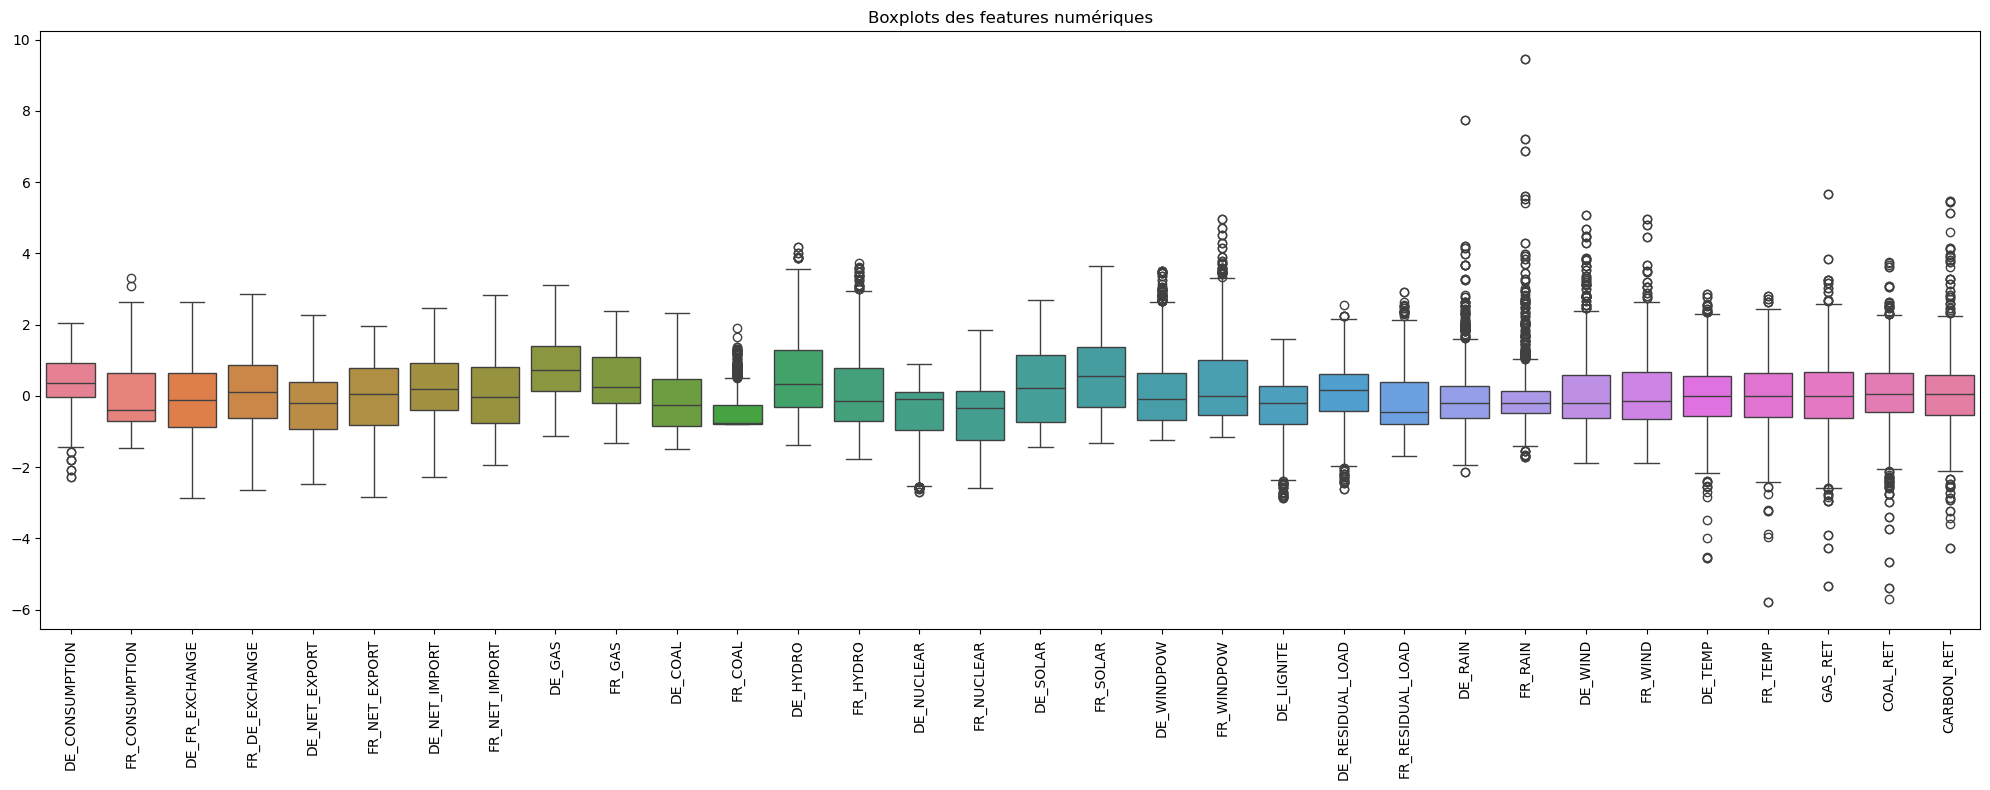

In [20]:
# Boxplot de toutes les features numériques sur un seul graphique
numeric_cols = X_train.drop(columns=categorical_features + ['ID', 'DAY_ID','TARGET'], errors='ignore')

plt.figure(figsize=(20, 8))
sns.boxplot(data=numeric_cols)
plt.xticks(rotation=90)
plt.title('Boxplots des features numériques')
plt.tight_layout()
plt.show()


#### Commentaires:
- Bien que plusieurs variables présentent des valeurs extrêmes, on ne les supprime pas. En effet, ces valeurs correspondent à des événements économiques et météorologiques réels (pics de prix de l’énergie, stress du réseau, conditions météorologiques exceptionnelles) et font partie intégrante du phénomène étudié. Les méthodes de détection d’outliers basées sur des hypothèses de normalité (telles que le Z-score) n’ont donc pas été retenues, afin d’éviter un biais d’échantillonnage et une perte d’information économiquement pertinente 

(cf papier Day-Ahead electricity price forecasting)
La seule exception ce serait les données meteorologiques. On verifie donc qu'il n'existe pas de valeurs impossibles

In [21]:

X_train[["FR_RAIN", "DE_RAIN", "FR_WIND",  "FR_TEMP", "DE_TEMP"]].describe()

,FR_RAIN,DE_RAIN,FR_WIND,FR_TEMP,DE_TEMP
count,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000
mean,0.018139,-0.035451,0.115354,0.007876,0.008857
std,1.018143,0.952789,1.021388,0.971259,0.941288
min,-1.726420,-2.128531,-1.895319,-5.787097,-4.549638
25%,-0.488625,-0.618791,-0.645796,-0.597690,-0.577139
50%,-0.193154,-0.211042,-0.146217,0.000000,0.000000
75%,0.125947,0.274779,0.677040,0.650856,0.569285
max,9.473201,7.756118,4.965028,2.817239,2.858758


les valeurs sont normales, il y'a pas de valeur extremes. on ne fait rien.

### Feature ingenering 

In [22]:
X_train['DAY_ID'].describe()

count    1494.000000
mean      591.861446
std       345.065043
min         0.000000
25%       292.250000
50%       591.000000
75%       885.750000
max      1215.000000
Name: DAY_ID, dtype: float64

In [23]:
X_test['DAY_ID'].describe()

count     654.000000
mean      632.744648
std       356.751037
min         4.000000
25%       334.000000
50%       633.500000
75%       952.000000
max      1214.000000
Name: DAY_ID, dtype: float64

Les jours vont de 0 à 1215 on ne peut pas faire grand chose, on ne peut pas creer de variables weekly. Cependant on peut essayer de creer des time block.

In [24]:
X_train["time_block"] = pd.qcut(X_train["DAY_ID"], q=4, labels=False)
X_test["time_block"] = pd.qcut(X_test["DAY_ID"], q=4, labels=False)



#### variations journalières du prix de matières premières

les variations jouranlieres brut des matieres premieres sont tres bruités. Il est recommandé dans les papiers (Weron (2014) – Electricity price forecasting) les regime indicators sur fuel prices. on calcule d'baord une moyenne mobile sur 7 jours puis on calcul puis on separe en 3 quantiles : "low", "medium", "high"

In [25]:
X_DE = X_train[X_train['COUNTRY'] == 0]
X_FR = X_train[X_train['COUNTRY'] == 1]
X_DE_test= X_test[X_test['COUNTRY'] == 0]
X_FR_test= X_test[X_test['COUNTRY'] == 1]

X_DE = X_DE.sort_values("DAY_ID")
X_FR = X_FR.sort_values("DAY_ID")
X_DE_test = X_DE_test.sort_values("DAY_ID")
X_FR_test = X_FR_test.sort_values("DAY_ID")

def rolling_mean_features(df, target_col, window_sizes):
    for window_size in window_sizes:
        for col in target_cols:
            df[col + "_MA_7"] = df[col].rolling(window=window_size, min_periods=1).mean()
    return df

window_sizes = [7, 14, 30]
target_cols = ['GAS_RET', 'COAL_RET', 'CARBON_RET']
X_DE = rolling_mean_features(X_DE, target_cols, window_sizes)
X_FR = rolling_mean_features(X_FR, target_cols, window_sizes)
X_DE_test = rolling_mean_features(X_DE_test, target_cols, window_sizes)
X_FR_test = rolling_mean_features(X_FR_test, target_cols, window_sizes)   

X_train = pd.concat([X_DE, X_FR])
X_test= pd.concat([X_DE_test, X_FR_test])




In [26]:
display(X_train.head())
display(X_train.tail())

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET,time_block,GAS_RET_MA_7,COAL_RET_MA_7,CARBON_RET_MA_7
1468,111,2,0,-0.068972,-0.667390,-1.102015,1.102015,-1.080403,0.256736,1.080403,...,-0.926064,-0.148950,0.641235,1.802550,1.140920,0.900434,0,1.802550,1.140920,0.900434
680,800,3,0,-0.134670,-0.834564,-1.051716,1.051716,-1.881881,-0.612133,1.881881,...,0.488650,-1.710888,-0.951057,0.440121,-0.064550,-0.032756,0,1.121336,0.538185,0.433839
991,831,5,0,-0.297850,-0.470371,0.144615,-0.144615,-1.208286,-1.811403,1.208286,...,0.021868,-0.062187,1.459745,-0.117977,0.550433,0.781870,0,0.708232,0.542268,0.549849
1356,779,7,0,0.057599,-0.625625,0.002239,-0.002239,-0.676226,-0.745182,0.676226,...,1.367421,-0.812164,0.954384,-0.379980,0.518459,-0.034642,0,0.436179,0.536315,0.403727
713,841,8,0,-0.282744,-0.700027,1.309253,-1.309253,0.248085,-2.226840,-0.248085,...,1.584210,-0.441943,-0.382423,1.557325,0.146634,2.329924,0,0.660408,0.458379,0.788966


,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET,time_block,GAS_RET_MA_7,COAL_RET_MA_7,CARBON_RET_MA_7
479,2039,1208,1,0.046568,-0.709011,0.427976,-0.427976,-0.578391,-1.678101,0.578391,...,0.630211,1.065727,-1.439105,0.291714,0.568479,0.395742,3,0.308468,0.270032,0.109541
1451,972,1209,1,1.109804,1.301061,1.565552,-1.565552,0.000000,0.000000,0.000000,...,-0.463636,-0.251075,-0.387127,-0.411589,1.774694,1.038661,3,0.260587,0.250637,0.106696
1007,1987,1212,1,-0.046100,-0.520506,-0.270515,0.270515,-0.137917,-0.789824,0.137917,...,1.123953,-0.707839,-0.308232,0.017778,0.072168,-0.160792,3,0.265039,0.253150,0.101696
873,1688,1213,1,1.407027,1.313254,-0.456126,0.456126,0.333142,-0.069222,-0.333142,...,0.000000,0.000000,0.000000,-0.103642,-0.633007,0.214805,3,0.282441,0.192597,0.099015
1437,1049,1215,1,0.544810,-0.378158,-0.065993,0.065993,0.000000,0.257829,0.000000,...,-0.882630,-0.247278,0.755489,0.758698,0.078518,0.192945,3,0.316327,0.183073,0.225795


on separe les regime indicators apres avoir fait le split test/val pour ne pas avoir de fuite

#### mesure de production

les interaction meteo x production sont tres influents sur le prix de l'electrcité. Un jour très venteux avec beaucoup d’éolien=prix plus bas. un jour venteux mais peu d’éolien = effet faible (Ziel & Weron (2018), Gianfreda et al. (2016))

In [27]:
# interactions vent × éolien
X_train["DE_WIND_WINDPOW"] = X_train["DE_WIND"] * X_train["DE_WINDPOW"]
X_train["FR_WIND_WINDPOW"] = X_train["FR_WIND"] * X_train["FR_WINDPOW"]

# température × residual load
X_train["DE_TEMP_RESLOAD"] = X_train["DE_TEMP"] * X_train["DE_RESIDUAL_LOAD"]

X_train["FR_TEMP_RESLOAD"] = X_train["FR_TEMP"] * X_train["FR_RESIDUAL_LOAD"]

# pluie × hydro
X_train["DE_RAIN_HYDRO"] = X_train["DE_RAIN"] * X_train["DE_HYDRO"]

X_train["FR_RAIN_HYDRO"] = X_train["FR_RAIN"] * X_train["FR_HYDRO"]


X_test["DE_WIND_WINDPOW"] = X_test["DE_WIND"] * X_test["DE_WINDPOW"]
X_test["FR_WIND_WINDPOW"] = X_test["FR_WIND"] * X_test["FR_WINDPOW"]
X_test["DE_TEMP_RESLOAD"] = X_test["DE_TEMP"] * X_test["DE_RESIDUAL_LOAD"]
X_test["FR_TEMP_RESLOAD"] = X_test["FR_TEMP"] * X_test["FR_RESIDUAL_LOAD"]
X_test["DE_RAIN_HYDRO"] = X_test["DE_RAIN"] * X_test["DE_HYDRO"]
X_test["FR_RAIN_HYDRO"] = X_test["FR_RAIN"] * X_test["FR_HYDRO"]


consommation

De meme l'interraction entre les exportations/importations et le residual load est important d'apres la litterature. Plus le residual load est élevé, plus le système est sous tension. residual load elevé + import net elevé ca veut dire que le pays n'arrive pas a produire suffisament = prix qui explose 

In [28]:
X_train["LOAD_IMPORT_FR"]=X_train["FR_RESIDUAL_LOAD"] * X_train['FR_NET_IMPORT']
X_train["LOAD_IMPORT_DE"]=X_train["DE_RESIDUAL_LOAD"] * X_train['DE_NET_IMPORT']
X_test["LOAD_IMPORT_FR"]=X_test["FR_RESIDUAL_LOAD"] * X_test['FR_NET_IMPORT']
X_test["LOAD_IMPORT_DE"]=X_test["DE_RESIDUAL_LOAD"] * X_test['DE_NET_IMPORT']


Energies renouvelables et non renouvlables disponibles

In [29]:

X_train['DE_NON_RENEWABLE'] = X_train['DE_GAS'] + X_train['DE_COAL'] + X_train['DE_LIGNITE'] + X_train['DE_NUCLEAR']
X_train['DE_RENEWABLE'] = X_train['DE_HYDRO'] + X_train['DE_SOLAR'] + X_train['DE_WINDPOW']
X_train['DE_EXCESS_ENERGY'] = X_train['DE_NON_RENEWABLE'] + X_train['DE_RENEWABLE'] - X_train['DE_CONSUMPTION']
X_train['FR_NON_RENEWABLE'] = X_train['FR_GAS'] + X_train['FR_COAL'] + X_train['FR_NUCLEAR']
X_train['FR_RENEWABLE'] = X_train['FR_HYDRO'] + X_train['FR_SOLAR'] + X_train['FR_WINDPOW']
X_train['FR_EXCESS_ENERGY'] = X_train['FR_NON_RENEWABLE'] + X_train['FR_RENEWABLE'] - X_train['FR_CONSUMPTION']

X_test['DE_NON_RENEWABLE'] = X_test['DE_GAS'] + X_test['DE_COAL'] + X_test['DE_LIGNITE'] + X_test['DE_NUCLEAR']
X_test['DE_RENEWABLE'] = X_test['DE_HYDRO'] + X_test['DE_SOLAR'] + X_test['DE_WINDPOW']
X_test['DE_EXCESS_ENERGY'] = X_test['DE_NON_RENEWABLE'] + X_test['DE_RENEWABLE'] - X_test['DE_CONSUMPTION'] 
X_test['FR_NON_RENEWABLE'] = X_test['FR_GAS'] + X_test['FR_COAL'] + X_test['FR_NUCLEAR']
X_test['FR_RENEWABLE'] = X_test['FR_HYDRO'] + X_test['FR_SOLAR'] + X_test['FR_WINDPOW']
X_test['FR_EXCESS_ENERGY'] = X_test['FR_NON_RENEWABLE'] + X_test['FR_RENEWABLE'] - X_test['FR_CONSUMPTION'] 

In [30]:
  # 2. RATIOS - Comparaisons DE / FR
X_train['CONSUMPTION_RATIO'] = X_train['DE_CONSUMPTION'] / (X_train['FR_CONSUMPTION'] + 1e-6)
X_train['RESIDUAL_LOAD_RATIO'] = X_train['DE_RESIDUAL_LOAD'] / (X_train['FR_RESIDUAL_LOAD'] + 1e-6)

# 3. TOTAUX EU - Sommes DE + FR
X_train['EU_TOTAL_CONSUMPTION'] = X_train['DE_CONSUMPTION'] + X_train['FR_CONSUMPTION']
X_train['EU_TOTAL_RESIDUAL_LOAD'] = X_train['DE_RESIDUAL_LOAD'] + X_train['FR_RESIDUAL_LOAD']
X_train['EU_TOTAL_NET_IMPORT'] = X_train['DE_NET_IMPORT'] + X_train['FR_NET_IMPORT']

# 4. STRESS INDICATORS - Indicateurs de tension du réseau
X_train['DE_LOAD_STRESS'] = X_train['DE_RESIDUAL_LOAD'] / (X_train['DE_CONSUMPTION'] + 1e-6)
X_train['FR_LOAD_STRESS'] = X_train['FR_RESIDUAL_LOAD'] / (X_train['FR_CONSUMPTION'] + 1e-6)

# 5. METEO CROSS - Différences météo
if 'DE_TEMP' in X_train.columns and 'FR_TEMP' in X_train.columns:
    X_train['TEMP_SPREAD'] = X_train['DE_TEMP'] - X_train['FR_TEMP']
if 'DE_WIND' in X_train.columns and 'FR_WIND' in X_train.columns:
    X_train['WIND_SPREAD'] = X_train['DE_WIND'] - X_train['FR_WIND']
if 'DE_RAIN' in X_train.columns and 'FR_RAIN' in X_train.columns:
    X_train['RAIN_SPREAD'] = X_train['DE_RAIN'] - X_train['FR_RAIN']

X_test['CONSUMPTION_RATIO'] = X_test['DE_CONSUMPTION'] / (X_test['FR_CONSUMPTION'] + 1e-6)
X_test['RESIDUAL_LOAD_RATIO'] = X_test['DE_RESIDUAL_LOAD'] / (X_test['FR_RESIDUAL_LOAD'] + 1e-6)
X_test['EU_TOTAL_CONSUMPTION'] = X_test['DE_CONSUMPTION'] + X_test['FR_CONSUMPTION']
X_test['EU_TOTAL_RESIDUAL_LOAD'] = X_test['DE_RESIDUAL_LOAD'] + X_test['FR_RESIDUAL_LOAD']
X_test['EU_TOTAL_NET_IMPORT'] = X_test['DE_NET_IMPORT'] + X_test['FR_NET_IMPORT']
X_test['DE_LOAD_STRESS'] = X_test['DE_RESIDUAL_LOAD'] / (X_test['DE_CONSUMPTION'] + 1e-6)
X_test['FR_LOAD_STRESS'] = X_test['FR_RESIDUAL_LOAD'] / (X_test['FR_CONSUMPTION'] + 1e-6)
if 'DE_TEMP' in X_test.columns and 'FR_TEMP' in X_test.columns:
    X_test['TEMP_SPREAD'] = X_test['DE_TEMP'] - X_test['FR_TEMP']
if 'DE_WIND' in X_test.columns and 'FR_WIND' in X_test.columns:
    X_test['WIND_SPREAD'] = X_test['DE_WIND'] - X_test['FR_WIND']
if 'DE_RAIN' in X_test.columns and 'FR_RAIN' in X_test.columns:
    X_test['RAIN_SPREAD'] = X_test['DE_RAIN'] - X_test['FR_RAIN']
    

### Séparation du Dataset en deux jeux : Entraînement et Validation V1

Méthode 1 : On sépare notre jeux de données, tout en respectant la chronologie au sein des données allemandes et françaises. L'idée est de prédire le futur. On choisit un séparation 80% / 20%.

In [31]:

# split_ratio = 0.8

# X_tr_list, X_val_list = [], []
# y_tr_list, y_val_list = [], []


# #pour chaque pays 
# for country_val in X_train["COUNTRY"].unique():
#     X_c = X_train[X_train["COUNTRY"] == country_val].copy()
#     #on recupere y correspondant (extraire la colonne TARGET pour avoir une Series)
#     y_c = y_train.loc[X_c.index, "TARGET"].copy()

#     # on s'assure d'un ordre temporel
#     X_c = X_c.sort_values("DAY_ID")
#     y_c = y_c.loc[X_c.index]

#     # on split 
#     days = np.sort(X_c["DAY_ID"].unique())
#     cutoff_idx = int(len(days) * split_ratio)
#     cutoff_day = days[cutoff_idx]

#     train_mask = X_c["DAY_ID"] < cutoff_day
#     val_mask   = X_c["DAY_ID"] >= cutoff_day

#     X_tr_list.append(X_c.loc[train_mask])
#     X_val_list.append(X_c.loc[val_mask])
#     y_tr_list.append(y_c.loc[train_mask])
#     y_val_list.append(y_c.loc[val_mask])

# # on concatene les pays
# X_tr = pd.concat(X_tr_list).sort_index()
# X_val = pd.concat(X_val_list).sort_index()
# y_tr = pd.concat(y_tr_list).sort_index()
# y_val = pd.concat(y_val_list).sort_index()


In [32]:

# #TARGET ne doit pas être dans X
# assert "TARGET" not in X_tr.columns
# assert "TARGET" not in X_val.columns

# # Check dimensions cohérentes
# assert len(X_tr) == len(y_tr)
# assert len(X_val) == len(y_val)

# # Check : les deux pays sont présents dans train et val
# print("Train COUNTRY counts:\n", X_tr["COUNTRY"].value_counts())
# print("Val   COUNTRY counts:\n", X_val["COUNTRY"].value_counts())

on drop les id

In [33]:
# X_tr = X_tr.drop(columns=["ID"], errors="ignore")
# X_val = X_val.drop(columns=["ID"], errors="ignore")


### Feature enginnering (bis)

#### variations journalières du prix de matières premières

In [34]:
# ma_cols = [
#     "GAS_RET_MA_7",
#     "COAL_RET_MA_7",
#     "CARBON_RET_MA_7",
# ]

# # Calcul des seuils de quantiles sur le jeu d'entraînement
# regime_thresholds = {}
# for col in ma_cols:
#     q_low, q_high = X_tr[col].quantile([1/3, 2/3]).values
#     regime_thresholds[col] = (q_low, q_high)

# # Fonction pour ajouter les features de régime 3
# def add_3regime_features(df: pd.DataFrame, thresholds: dict, suffix="_REG3") -> pd.DataFrame:
#     df = df.copy()
#     for col, (q_low, q_high) in thresholds.items():
#         # returns 0 (low), 1 (mid), 2 (high)
#         df[col + suffix] = pd.cut(
#             df[col],
#             bins=[-np.inf, q_low, q_high, np.inf],
#             labels=[0, 1, 2],
#             include_lowest=True
#         ).astype(int)
#     return df

# # Ajouter les features de régime 3 aux jeux de données
# X_tr  = add_3regime_features(X_tr,  regime_thresholds)
# X_val = add_3regime_features(X_val, regime_thresholds)
# X_test = add_3regime_features(X_test, regime_thresholds)

### La multicolinéarité

In [35]:
import seaborn as sns

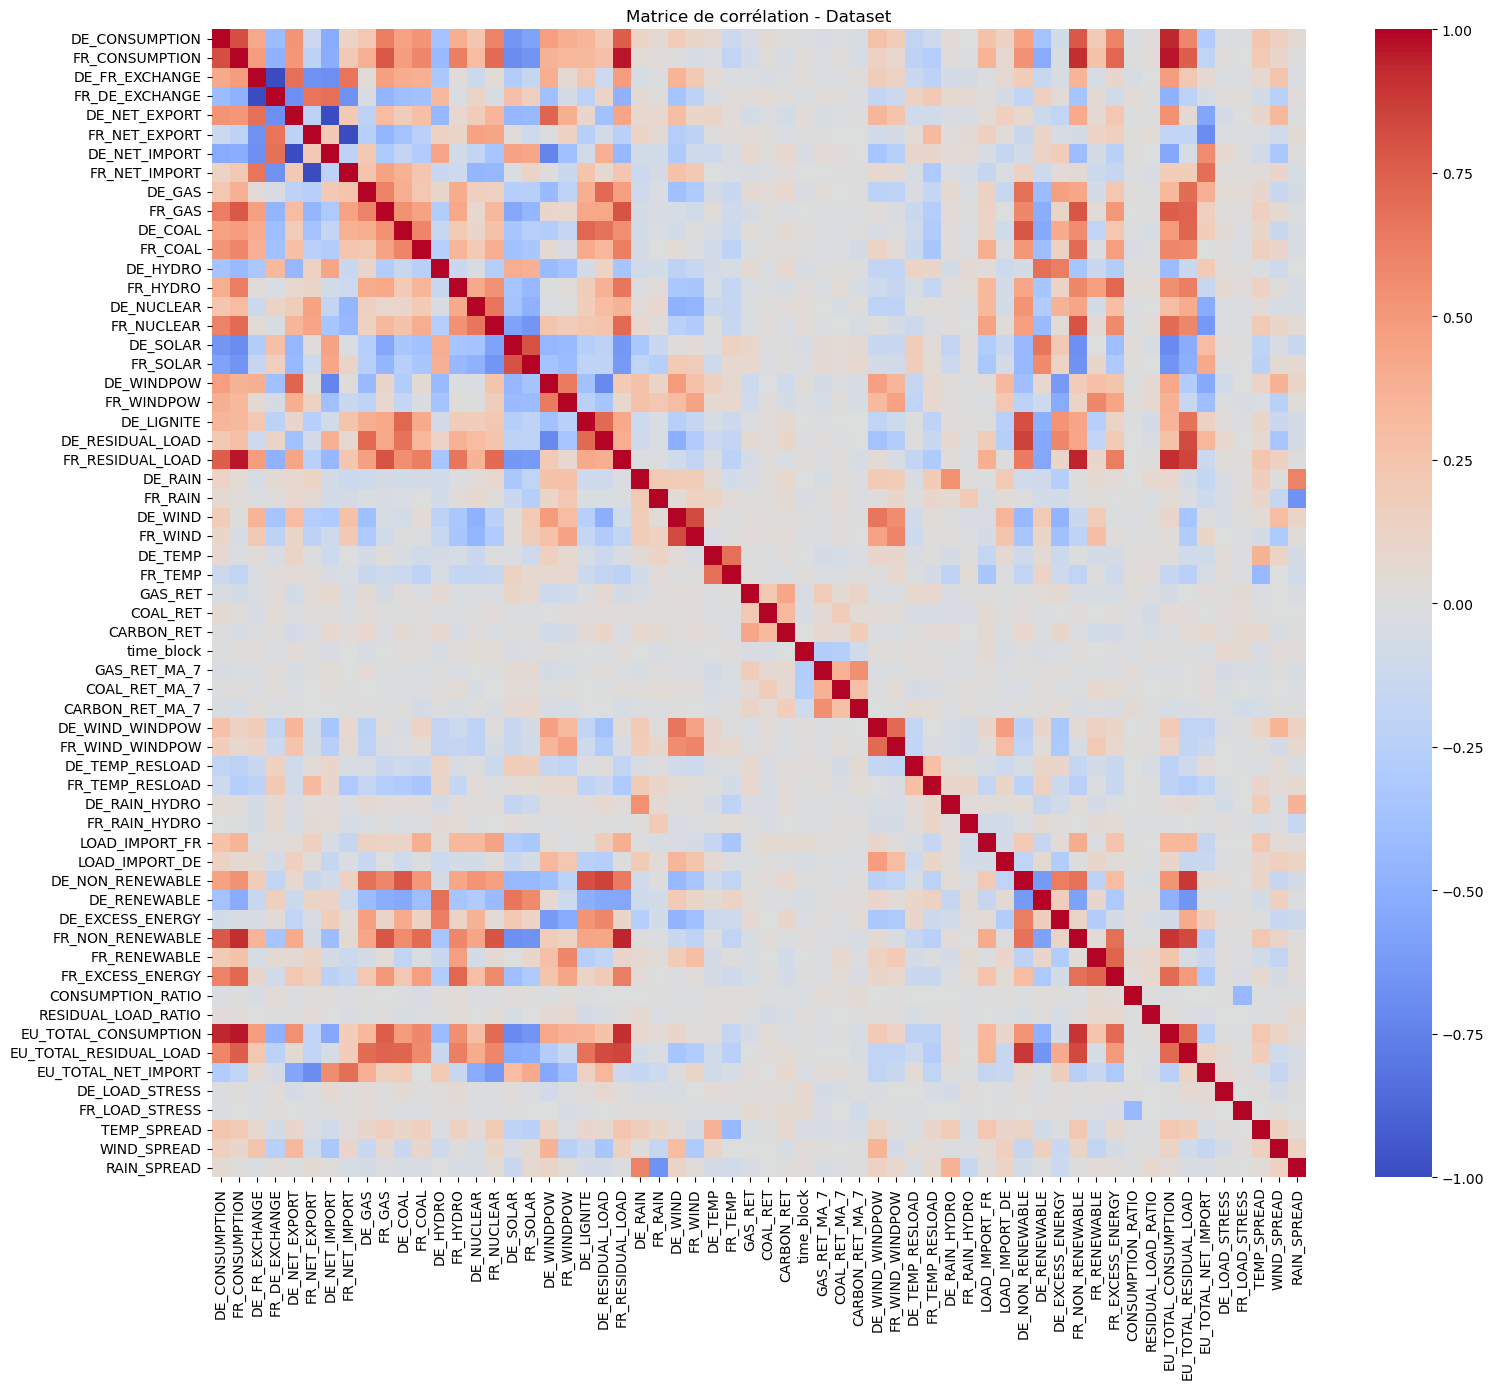

In [36]:
plt.figure(figsize=(16, 14))
numeric_cols = X_train.drop(columns=categorical_features + ['ID', 'DAY_ID'], errors='ignore')
sns.heatmap(numeric_cols.corr(), cmap="coolwarm", annot=False, fmt='.2f', cbar=True)
plt.title('Matrice de corrélation - Dataset')
plt.tight_layout()
plt.show()

In [37]:
# Trouver les colonnes à supprimer pour éviter la multicolinéarité
corr_matrix = numeric_cols.corr()
cols = corr_matrix.columns
cols_corr = []

for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        if abs(corr_matrix.iloc[i, j]) > 0.80:
            cols_corr.append((cols[i], cols[j]))

# Supprimer les doublons dans la liste
cols_corr = list(set(cols_corr))

print(f"Les features fortement corrélés sont (corrélation > 0.80):" )
print(cols_corr)

Les features fortement corrélés sont (corrélation > 0.80):
[('DE_WIND', 'FR_WIND'), ('DE_LIGNITE', 'DE_NON_RENEWABLE'), ('DE_RESIDUAL_LOAD', 'EU_TOTAL_RESIDUAL_LOAD'), ('FR_CONSUMPTION', 'FR_RESIDUAL_LOAD'), ('FR_CONSUMPTION', 'EU_TOTAL_CONSUMPTION'), ('DE_NET_EXPORT', 'DE_NET_IMPORT'), ('DE_CONSUMPTION', 'FR_CONSUMPTION'), ('FR_RESIDUAL_LOAD', 'FR_NON_RENEWABLE'), ('FR_NON_RENEWABLE', 'EU_TOTAL_RESIDUAL_LOAD'), ('DE_CONSUMPTION', 'EU_TOTAL_CONSUMPTION'), ('FR_RESIDUAL_LOAD', 'EU_TOTAL_RESIDUAL_LOAD'), ('DE_SOLAR', 'FR_SOLAR'), ('DE_RESIDUAL_LOAD', 'DE_NON_RENEWABLE'), ('FR_NET_EXPORT', 'FR_NET_IMPORT'), ('FR_CONSUMPTION', 'FR_NON_RENEWABLE'), ('FR_NON_RENEWABLE', 'EU_TOTAL_CONSUMPTION'), ('FR_RESIDUAL_LOAD', 'EU_TOTAL_CONSUMPTION'), ('DE_FR_EXCHANGE', 'FR_DE_EXCHANGE'), ('DE_NON_RENEWABLE', 'EU_TOTAL_RESIDUAL_LOAD')]


#### Commentaires : 
- certains feautures sont extrêment corrélés, nous allons donc en supprimer de notre dataset pour éviter la multicolinéarité: "FR_RESIDUAL_LOAD", "DE_SOLAR", "DE_CONSUMPTION", "DE_WIND", "DE_NET_EXPORT", "DE_FR_EXCHANGE", "FR_NET_EXPORT".
-   nous décidons de supprimer les données méthéorologiques allamandes et non françaises, puisque la majorité de nos target values concerent les variations de prix française, nous pensons donc que les données météorologiques françaises seront donc plus significatives en moyennes.
- Concernant les exportations et les importations, il s'agit du calcul net importation - exportation reporté sur les deux variables. Nous supprimons les exportations, ainsi lorsque la variable importation est positive : on importe, lorsque elle est negative on exporte.
- On garde le residual load, d'apres l'etat de l'art assez important 

In [38]:
cols_to_remove = ["FR_NET_EXPORT",
                "DE_NET_EXPORT",
                "DE_LIGNITE",
                "DE_FR_EXCHANGE",
                "DE_WIND",
                "DE_CONSUMPTION",
                "FR_CONSUMPTION",
                "DE_SOLAR",
                "DE_RESIDUAL_LOAD",
                "FR_RESIDUAL_LOAD"
                ]
# X_tr = X_tr.drop(cols_to_remove, axis=1)
# X_val = X_val.drop(cols_to_remove, axis=1)
# X_test = X_test.drop(cols_to_remove, axis=1)

X_train = X_train.drop(cols_to_remove, axis=1)
X_test = X_test.drop(cols_to_remove, axis=1)

### Correlation between Taget and Features

données DE et FR confondues

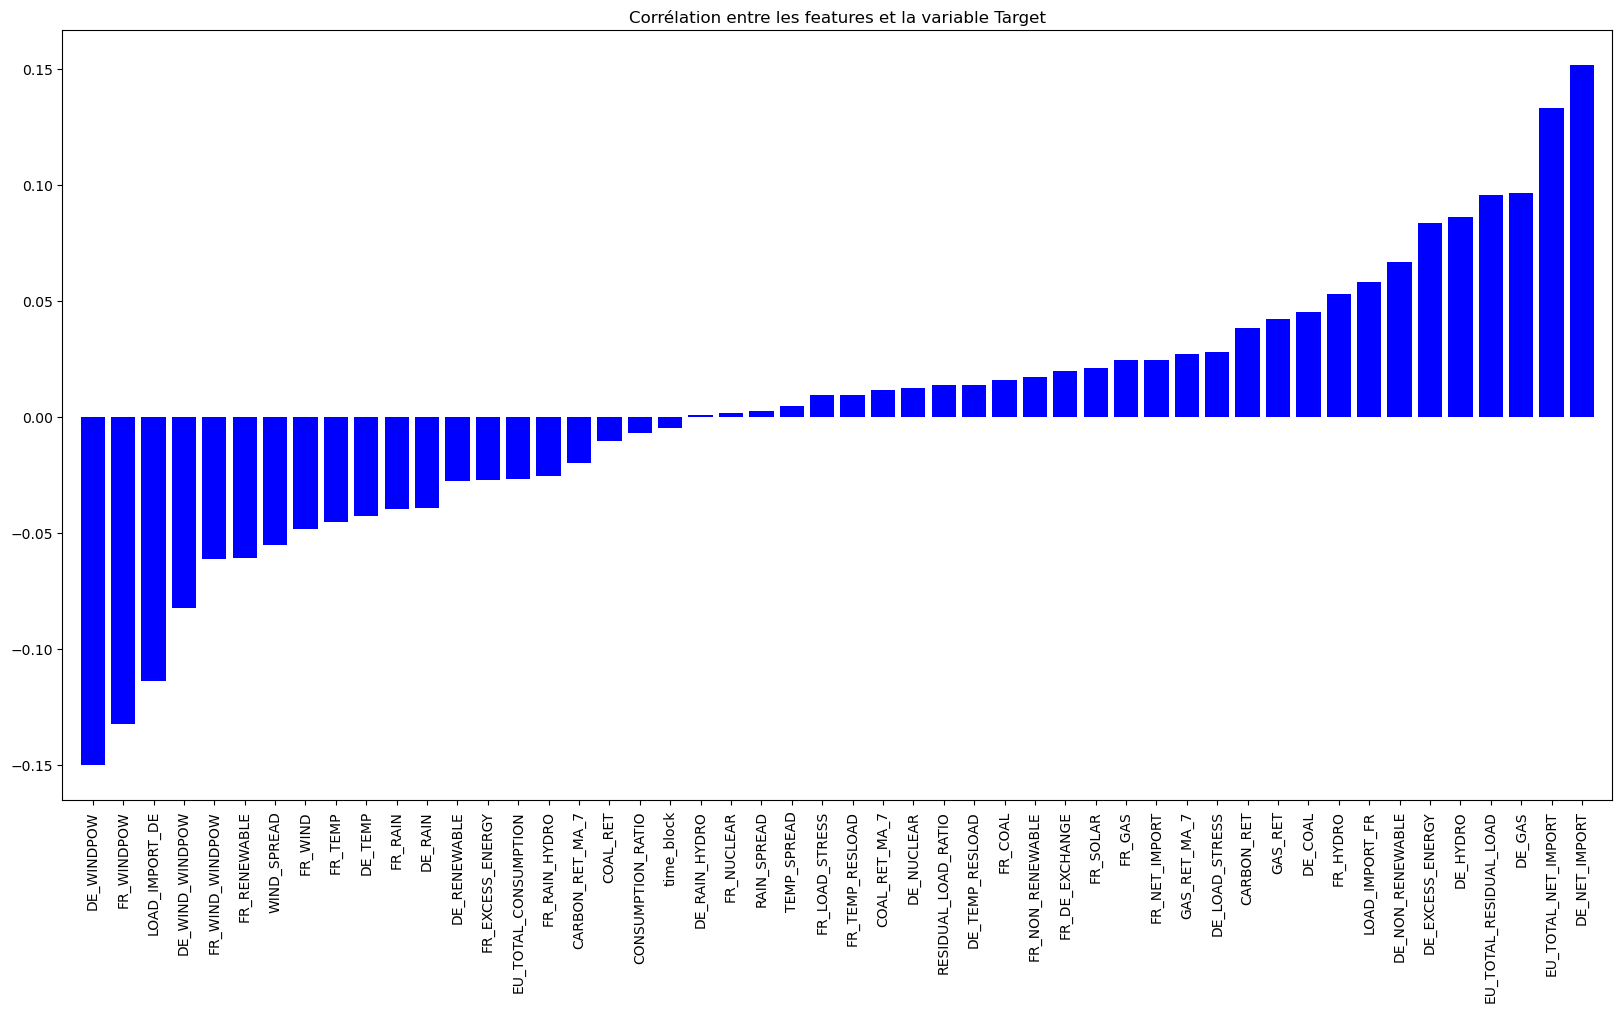

Variables avec faible corrélation |corrélation| < 0.2 (DE):


DE_WINDPOW               -0.150287
FR_WINDPOW               -0.132523
LOAD_IMPORT_DE           -0.114075
DE_WIND_WINDPOW          -0.082228
FR_WIND_WINDPOW          -0.061153
FR_RENEWABLE             -0.061064
WIND_SPREAD              -0.055347
FR_WIND                  -0.048503
FR_TEMP                  -0.045250
DE_TEMP                  -0.042980
FR_RAIN                  -0.039778
DE_RAIN                  -0.039248
DE_RENEWABLE             -0.027839
FR_EXCESS_ENERGY         -0.027275
EU_TOTAL_CONSUMPTION     -0.026759
FR_RAIN_HYDRO            -0.025746
CARBON_RET_MA_7          -0.019880
COAL_RET                 -0.010285
CONSUMPTION_RATIO        -0.006855
time_block               -0.005006
DE_RAIN_HYDRO             0.000553
FR_NUCLEAR                0.001588
RAIN_SPREAD               0.002484
TEMP_SPREAD               0.004561
FR_LOAD_STRESS            0.009211
FR_TEMP_RESLOAD           0.009444
COAL_RET_MA_7             0.011422
DE_NUCLEAR                0.012236
RESIDUAL_LOAD_RATIO 

In [39]:
X_train_copy = X_train.copy()

# Exclure COUNTRY et DAY_ID du calcul de corrélation
# correlation = [metric_train(X[col], y['TARGET']) for col in X.columns]
# correlation_df = pd.DataFrame(correlation, index=X.columns, columns=['Features'])

features_to_correlate = X_train_copy.drop(columns=['ID', 'COUNTRY', 'DAY_ID'], errors='ignore')
corr_matrix = features_to_correlate.corrwith(y_train["TARGET"], method='pearson')
corr_matrix = corr_matrix.dropna().sort_values()

plt.figure(figsize=(20, 10))
plt.title("Corrélation entre les features et la variable Target")
plt.bar(range(len(corr_matrix)), corr_matrix, color="blue", align="center")
plt.xticks(range(len(corr_matrix)), corr_matrix.index, rotation='vertical')
plt.xlim([-1, len(corr_matrix)])
plt.show()


print("Variables avec faible corrélation |corrélation| < 0.2 (DE):")
low_correlations = (corr_matrix[abs(corr_matrix) < 0.2])
low_correlations

In [40]:
cols_to_remove_2 = ["FR_NUCLEAR", "DE_RAIN_HYDRO"]

X_train = X_train.drop(cols_to_remove_2, axis=1)
X_test = X_test.drop(cols_to_remove_2, axis=1)

In [41]:
# # Corrélations pour l'Allemagne (DE)
# X_DE_filtered = X_tr[X_tr['COUNTRY'] == 0].copy()
# y_DE_filtered = y_tr[y_tr.index.isin(X_DE_filtered.index)]

# # Exclure COUNTRY et DAY_ID du calcul de corrélation
# features_to_correlate = X_DE_filtered.drop(columns=['COUNTRY', 'DAY_ID'], errors='ignore')
# corr_matrix_DE = features_to_correlate.corrwith(y_DE_filtered, method='pearson')
# corr_matrix_DE = corr_matrix_DE.dropna().sort_values()

# plt.figure(figsize=(20, 10))
# plt.title("Corrélation entre les features et la variable Target - ALLEMAGNE")
# plt.bar(range(len(corr_matrix_DE)), corr_matrix_DE, color="blue", align="center")
# plt.xticks(range(len(corr_matrix_DE)), corr_matrix_DE.index, rotation='vertical')
# plt.xlim([-1, len(corr_matrix_DE)])
# plt.show()


# print("Variables avec |corrélation| > 0.2 (DE):")
# print(corr_matrix_DE[abs(corr_matrix_DE) > 0.2])

#### Commentaires:

- Les variables les plus corrélées avec les variations du prix de l'electricité allemandes sont : "DE_WINDPOW", "DE_RESIDUAL_LOAD", "DE_NET_NET_IMPORT".

In [42]:
# # Corrélations pour la France (FR)

# X_FR_filtered = X_tr[X_tr['COUNTRY'] == 1].copy()
# y_FR_filtered = y_tr[y_tr.index.isin(X_FR_filtered.index)]

# # Exclure COUNTRY et DAY_ID du calcul de corrélation
# features_to_correlate = X_FR_filtered.drop(columns=['COUNTRY', 'DAY_ID'], errors='ignore')
# corr_matrix_FR = features_to_correlate.corrwith(y_FR_filtered, method='pearson')
# corr_matrix_FR = corr_matrix_FR.dropna().sort_values()

# plt.figure(figsize=(20, 10))
# plt.title("Corrélation entre les features et la variable Target - FRANCE")
# plt.bar(range(len(corr_matrix_FR)), corr_matrix_FR, color="red", align="center")
# plt.xticks(range(len(corr_matrix_FR)), corr_matrix_FR.index, rotation='vertical')
# plt.xlim([-1, len(corr_matrix_FR)])
# plt.show()

# print(corr_matrix_FR[abs(corr_matrix_FR) > 0.2])
# print("Variables avec |corrélation| > 0.2 (FR):")

#### Commentaires:

- En général, les variables sont faiblements corrélées avec les variations du prix de l'electricité allemandes.

### Séparation Entraînement Validation V2

Méthode 2 : On sépare simplement le dataset par un tri aléatoire 

In [43]:
#X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)
split_ratio = 0.8

X_tr_list, X_val_list = [], []
y_tr_list, y_val_list = [], []


#pour chaque pays 
for country_val in X_train["COUNTRY"].unique():
    X_c = X_train[X_train["COUNTRY"] == country_val].copy()
    #on recupere y correspondant (extraire la colonne TARGET pour avoir une Series)
    y_c = y_train.loc[X_c.index, "TARGET"].copy()

    # on s'assure d'un ordre temporel
    X_c = X_c.sort_values("DAY_ID")
    y_c = y_c.loc[X_c.index]

    # on split 
    days = np.sort(X_c["DAY_ID"].unique())
    cutoff_idx = int(len(days) * split_ratio)
    cutoff_day = days[cutoff_idx]

    train_mask = X_c["DAY_ID"] < cutoff_day
    val_mask   = X_c["DAY_ID"] >= cutoff_day

    X_tr_list.append(X_c.loc[train_mask])
    X_val_list.append(X_c.loc[val_mask])
    y_tr_list.append(y_c.loc[train_mask])
    y_val_list.append(y_c.loc[val_mask])

# on concatene les pays
X_tr = pd.concat(X_tr_list).sort_index()
X_val = pd.concat(X_val_list).sort_index()
y_tr = pd.concat(y_tr_list).sort_index()
y_val = pd.concat(y_val_list).sort_index()


In [44]:
X_tr = X_tr.drop(columns=["ID", "DAY_ID"], errors="ignore")
X_val = X_val.drop(columns=["ID", "DAY_ID"], errors="ignore")
y_tr = y_tr.drop(columns=["ID", "DAY_ID"], errors="ignore")
y_val = y_val.drop(columns=["ID", "DAY_ID"], errors="ignore")

### Normalisation des données

Etant donné que on a plusieurs valeurs extremes il est necessaire de standariser les données. On fit le scaler sur X_tr uniquement, puis on l'applique de manière équivalente à X_tr et X_val.


In [45]:
### Normalisation des données

from sklearn.preprocessing import StandardScaler

no_scale = ["COUNTRY"]
numeric_cols = [c for c in X_tr.columns if c not in no_scale]
# on fit le scaler sur train
scaler = StandardScaler()
scaler.fit(X_tr[numeric_cols])
# on transforme train et val
X_tr[numeric_cols] = scaler.transform(X_tr[numeric_cols])
X_val[numeric_cols] = scaler.transform(X_val[numeric_cols])
# ne pas oublier de scaler aussi le test plus tard
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [46]:
y_tr.head()
X_tr.head()

,COUNTRY,FR_DE_EXCHANGE,DE_NET_IMPORT,FR_NET_IMPORT,DE_GAS,FR_GAS,DE_COAL,FR_COAL,DE_HYDRO,FR_HYDRO,...,CONSUMPTION_RATIO,RESIDUAL_LOAD_RATIO,EU_TOTAL_CONSUMPTION,EU_TOTAL_RESIDUAL_LOAD,EU_TOTAL_NET_IMPORT,DE_LOAD_STRESS,FR_LOAD_STRESS,TEMP_SPREAD,WIND_SPREAD,RAIN_SPREAD
0,1,0.466684,-0.269458,-0.716354,-0.408733,-0.657756,1.053334,1.414280,1.491153,0.100460,...,0.032085,-0.066559,-0.412971,0.184325,-0.808994,0.269721,0.031123,-1.347305,-0.784774,0.351531
1,1,-0.143645,0.347234,1.018753,-0.722136,0.049221,-0.028883,-0.641311,-0.348845,-0.863965,...,0.033094,-0.039845,-0.945241,-1.024525,1.123530,1.684886,0.034728,-1.856988,1.174783,-0.323412
2,1,-1.233194,0.399387,1.543700,1.838508,1.919876,2.041254,2.369322,-0.618818,0.643325,...,0.034433,-0.034449,1.951198,2.314039,1.607424,0.074463,0.029667,0.721742,-0.048968,-0.084217
3,0,0.710062,0.021802,-0.593022,-0.353948,-0.207086,-1.577245,-0.688004,-0.855376,1.157718,...,0.035322,-0.026274,-1.476311,-1.429747,-0.486130,0.098957,0.033984,0.982264,-0.386037,-0.432084
4,1,0.799246,-0.269458,-0.999369,-0.646957,-0.687655,1.365884,0.311592,-0.729524,-0.853390,...,0.032593,-0.061608,-0.581423,0.090496,-1.048795,0.365405,0.026260,-0.177991,-0.081788,-0.044325


## Selection de la metrique

In [47]:
y_tr.describe()

count    1194.000000
mean        0.109836
std         1.061536
min        -6.519268
25%        -0.208531
50%         0.000000
75%         0.248091
max         7.786578
Name: TARGET, dtype: float64

In [48]:
import numpy as np
from scipy.stats import kurtosis

print(kurtosis(y_tr, fisher=True, bias=False))


13.67016775033153


L'objectif de ce data challenge est donné : c'est de capter corrrectement l'intensité relative et le sens des mouvements des futurs de l'electrcité. De ce fait c'est spearman qui a été choisit pour 'l'evaluation. 

Cependant la question se pose de choisir la metrique pour la loss function. Nos données target sont caracterisées par : 
- des outliers tres extremes, donc une queue tres longue
- une distribution relativement symetrique avec une mediane proche de 0
- des données typique entre -1 et 1 mais avec des extrmes 
- une queue tres epaisse donc les valeurs extremes sont tres frequentes. 

Puisque la validation repose sur le classement correct des variations 

Notre objectif n’est pas de prédire précisément l’amplitude des valeurs extrêmes, mais d’obtenir un classement cohérent des observations. On cherche donc à bien prédire l’ensemble de la distribution plutôt qu’à sur-pondérer quelques observations extrêmes. La RMSE, en pénalisant quadratiquement les erreurs, conduit le modèle à se concentrer excessivement sur les observations extrêmes, au détriment de la qualité globale du classement. Dans un contexte où l’objectif principal est ordinal, la MAE constitue une fonction de perte plus adaptée car elle répartit équitablement l’erreur sur l’ensemble des observations.

La métrique d’évaluation du challenge étant la corrélation de Spearman, notre objectif n’est pas de minimiser une erreur en niveau mais de préserver l’ordre relatif des variations journalières de prix.
Nous entraînons donc le modèle avec une loss MAE, plus robuste aux outliers fréquents sur les marchés de l’électricité, et nous évaluons la performance via Spearman, qui mesure la qualité de l’ordre prédit. Cette dissociation est classique en finance lorsque la métrique métier est une mesure de rang

## Regression lineaire

On commence par la regression lineaire. On utilise une regression lineaire par minimisation de la MAE

In [49]:
from sklearn.linear_model import QuantileRegressor
from scipy.stats import spearmanr

mae = QuantileRegressor(
    quantile=0.5,   # MAE = médiane
    alpha=0.0  # pas de régularisation
)

mae.fit(X_tr, y_tr)
y_pred_tr  = mae.predict(X_tr)
y_pred_val = mae.predict(X_val)
spearman_train = spearmanr(y_tr, y_pred_tr).correlation
spearman_val = spearmanr(y_val, y_pred_val).correlation
print(f"Spearman Train MAE Model: {spearman_train:.4f}")
print(f"Spearman Val   MAE Model: {spearman_val:.4f}")



Spearman Train MAE Model: 0.2947
Spearman Val   MAE Model: 0.2072


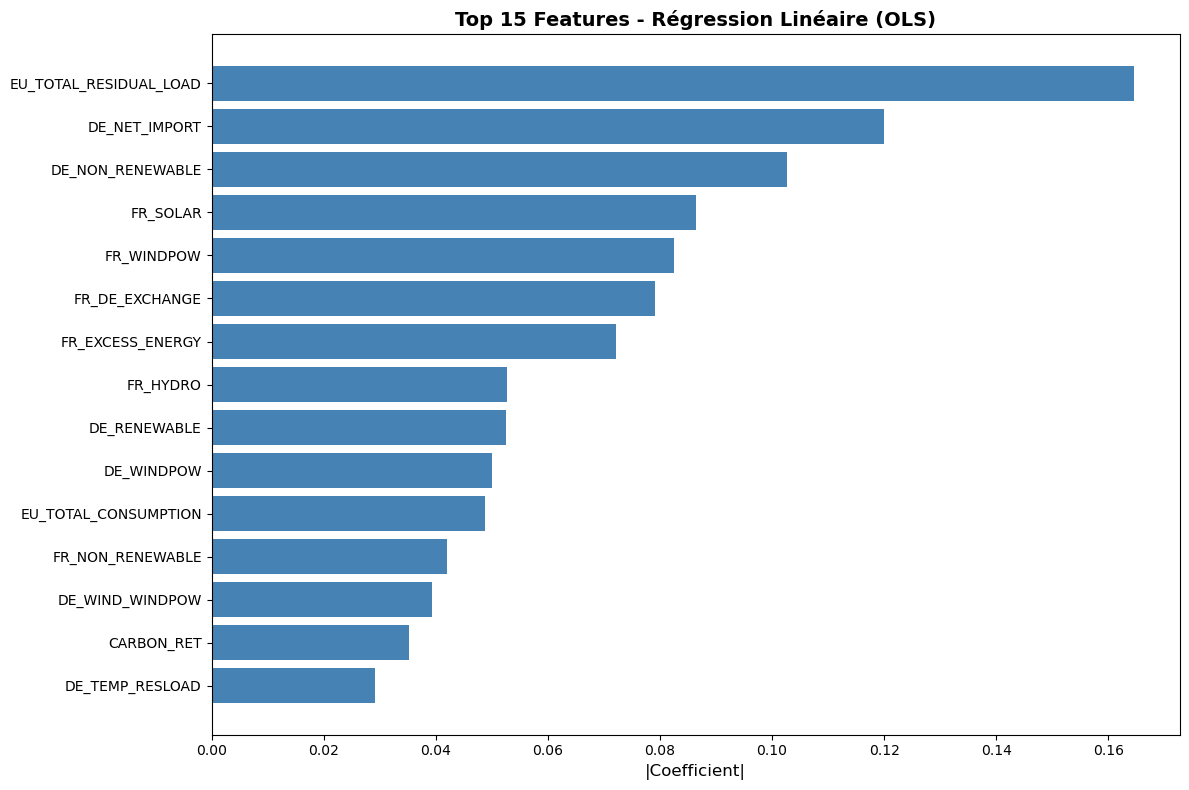

In [50]:
# Feature importance pour OLS (coefficients)
ols_coefs = pd.Series(mae.coef_, index=X_tr.columns).abs().sort_values(ascending=False)

# Graphique harmonisé
top_15_ols = ols_coefs.head(15).sort_values()
plt.figure(figsize=(12, 8))
plt.barh(range(15), top_15_ols.values, color='steelblue')
plt.yticks(range(15), top_15_ols.index)
plt.xlabel('|Coefficient|', fontsize=12)
plt.title('Top 15 Features - Régression Linéaire (OLS)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

La variable target  se concentre autour de zéro, avec un écart-type de 1 enviton, mais également des valeurs extrêmes atteignant ±7. Le RMSE obtenu sur l’échantillon de validation (≈0.93) est du même ordre de grandeur que l’écart-type de la série, indiquant que le modèle linéaire ne parvient pas à réduire significativement la variance du prix.
Sur 75 % des jours, Y est entre −0.21 et +0.25, une erreur de 0.9 est énorme relativement. 
Ceci se traduit par un coefficient de détermination négatif sur l’échantillon de validation. Ce comportement est typique des modèles linéaires appliqués aux prix de l’électricité, dont la dynamique est fortement non linéaire et dominée par des épisodes de volatilité extrême.

## 2. Modèle - Regression (Lasso)

on effectue l'equivalent du modele lasso mais sur une régression linéaire pénalisée minimisant une perte de type MAE, à laquelle est ajoutée une pénalisation L1 sur les coefficients

![alt text](image-1.png)

Étant donné que les données sont dépendantes du temps et que la métrique d’évaluation est la corrélation de rang de Spearman, une validation croisée K-fold standard introduirait une fuite d’information et conduirait à une estimation excessivement optimiste et instable du paramètre de régularisation optimal. Nous sélectionnons donc α à l’aide d’un jeu de validation respectant l’ordre temporel, ce qui reflète mieux la performance de classement hors-échantillon dans un cadre de prévision réaliste

In [51]:
import numpy as np
from sklearn.linear_model import QuantileRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import make_scorer
from scipy.stats import spearmanr

# --- scorer Spearman ---
def spearman_scorer(y_true, y_pred):
    return spearmanr(y_true, y_pred).correlation

spearman_score = make_scorer(
    spearman_scorer,
    greater_is_better=True
)

# --- grille d'alphas ---
alphas = np.logspace(-4, 1, 20)

# --- modèle ---
model = QuantileRegressor(
    quantile=0.5,      # MAE
    solver="highs"
)

param_grid = {
    "alpha": alphas
}

# --- CV temporelle ---
tscv = TimeSeriesSplit(n_splits=5)

# --- GridSearch temporel ---
search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring=spearman_score,
    cv=tscv,
    n_jobs=-1
)

# --- fit sur train (passé uniquement) ---
search.fit(X_tr, y_tr)

# --- meilleur modèle ---
best_model = search.best_estimator_

# --- évaluation out-of-sample (futur) ---
y_val_pred = best_model.predict(X_val)
spearman_val = spearmanr(y_val, y_val_pred).correlation

print("Best alpha (CV temporelle):", search.best_params_["alpha"])
print("Best Spearman (CV train):", search.best_score_)
print("Spearman (validation OOS):", spearman_val)


/var/folders/nq/qwtx6rd54k7686m_s4y2mxpw0000gn/T/ipykernel_60786/1326593363.py:9: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
/var/folders/nq/qwtx6rd54k7686m_s4y2mxpw0000gn/T/ipykernel_60786/1326593363.py:9: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
/var/folders/nq/qwtx6rd54k7686m_s4y2mxpw0000gn/T/ipykernel_60786/1326593363.py:9: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
/var/folders/nq/qwtx6rd54k7686m_s4y2mxpw0000gn/T/ipykernel_60786/1326593363.py:9: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
/var/folders/nq/qwtx6rd54k7686m_s4y2mxpw0000gn/T/ipykernel_60786/1326593363.py:9: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
/var/folders/nq/qwtx6rd54k7686m_s4y2mxpw0000gn/T/ipykernel_60786/1326593363.py:9: ConstantInputWarning: An input array i

Best alpha (CV temporelle): 0.023357214690901212
Best Spearman (CV train): 0.19886996227577575
Spearman (validation OOS): 0.26163195102650405


/var/folders/nq/qwtx6rd54k7686m_s4y2mxpw0000gn/T/ipykernel_60786/1326593363.py:9: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
/var/folders/nq/qwtx6rd54k7686m_s4y2mxpw0000gn/T/ipykernel_60786/1326593363.py:9: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
/var/folders/nq/qwtx6rd54k7686m_s4y2mxpw0000gn/T/ipykernel_60786/1326593363.py:9: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
/var/folders/nq/qwtx6rd54k7686m_s4y2mxpw0000gn/T/ipykernel_60786/1326593363.py:9: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
/var/folders/nq/qwtx6rd54k7686m_s4y2mxpw0000gn/T/ipykernel_60786/1326593363.py:9: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
/var/folders/nq/qwtx6rd54k7686m_s4y2mxpw0000gn/T/ipykernel_60786/1326593363.py:9: ConstantInputWarning: An input array i

L'objectif de ce data challenge est donné : c'est de capter corrrectement l'intensité relative et le sens des mouvements des futurs de l'electrcité. De ce fait c'est spearman qui a été choisit pour 'l'evaluation. 

Cependant la question se pose de choisir la metrique pour la loss function. Nos données target sont caracterisées par : 
- des outliers tres extremes, donc une queue tres longue
- une distribution relativement symetrique avec une mediane proche de 0
- des données typique entre -1 et 1 mais avec des extrmes 
- une queue tres epaisse donc les valeurs extremes sont tres frequentes. 

Puisque la validation repose sur le classement correct des variations 

Notre objectif n’est pas de prédire précisément l’amplitude des valeurs extrêmes, mais d’obtenir un classement cohérent des observations. On cherche donc à bien prédire l’ensemble de la distribution plutôt qu’à sur-pondérer quelques observations extrêmes. La RMSE, en pénalisant quadratiquement les erreurs, conduit le modèle à se concentrer excessivement sur les observations extrêmes, au détriment de la qualité globale du classement. Dans un contexte où l’objectif principal est ordinal, la MAE constitue une fonction de perte plus adaptée car elle répartit équitablement l’erreur sur l’ensemble des observations.

La métrique d’évaluation du challenge étant la corrélation de Spearman, notre objectif n’est pas de minimiser une erreur en niveau mais de préserver l’ordre relatif des variations journalières de prix.
Nous entraînons donc le modèle avec une loss MAE, plus robuste aux outliers fréquents sur les marchés de l’électricité, et nous évaluons la performance via Spearman, qui mesure la qualité de l’ordre prédit. Cette dissociation est classique en finance lorsque la métrique métier est une mesure de rang

Nombre de features sélectionnées par Lasso : 7 / 49


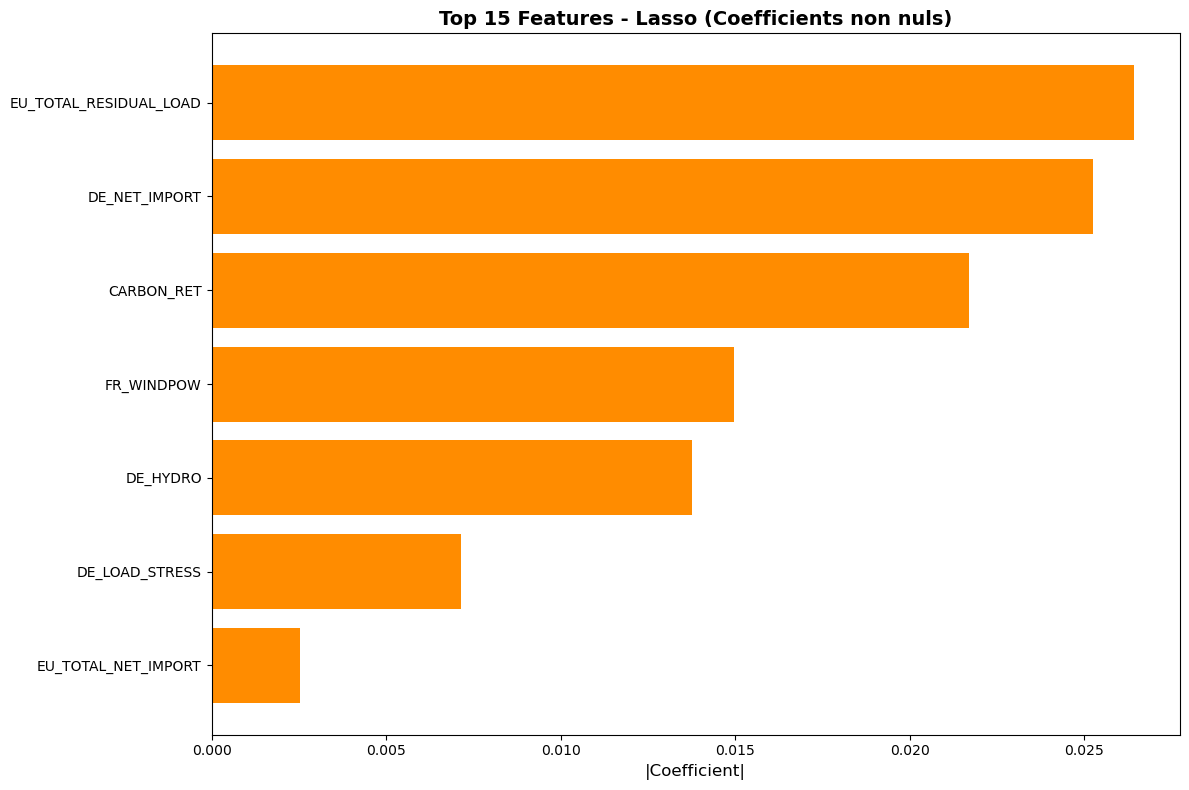

In [52]:
# Feature importance pour Lasso (coefficients non nuls)
lasso_coefs = pd.Series(best_model.coef_, index=X_tr.columns)
non_zero_coefs = lasso_coefs[lasso_coefs != 0].abs().sort_values(ascending=False)

print(f"Nombre de features sélectionnées par Lasso : {len(non_zero_coefs)} / {len(X_tr.columns)}")

# Graphique harmonisé
top_15_lasso = non_zero_coefs.head(15).sort_values()
plt.figure(figsize=(12, 8))
plt.barh(range(len(top_15_lasso)), top_15_lasso.values, color='darkorange')
plt.yticks(range(len(top_15_lasso)), top_15_lasso.index)
plt.xlabel('|Coefficient|', fontsize=12)
plt.title('Top 15 Features - Lasso (Coefficients non nuls)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [53]:
# Création fichier soumission
import shutil

Y_test_submission = X_test[['ID']].copy()
X_test_clean= X_test.drop(columns=["ID", "DAY_ID"], errors="ignore")
Y_test_submission['TARGET'] = best_model.predict(X_test_clean)
Y_test_submission.to_csv('benchmarkyy_qrt.csv', index=False)


shutil.move('benchmarkyy_qrt.csv', '../data/benchmarkyy_qrt.csv')

'../data/benchmarkyy_qrt.csv'

Nous avons a peu pres le meme resultat que la regression lineaire ce qui n'est pas etonnant

## 3. Modèle - Random Forest Regressor

Nous avons un probleme de prevision de prix de l'electricité, avec des relations non lineaires comme nous l'avons vu, pas mal de correlation, des jours extremes. Random forest est un bon choix de model ensembliste car il est robuste au bruit et a la multicolinarité 

In [54]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_absolute_error, make_scorer
from scipy.stats import spearmanr

def spearman_scorer(y_true, y_pred):
    y_true = np.asarray(y_true).ravel()
    y_pred = np.asarray(y_pred).ravel()
    return spearmanr(y_true, y_pred).correlation
spearman_score = make_scorer(
    spearman_scorer,
    greater_is_better=True
)
tscv = TimeSeriesSplit(n_splits=5)
param_grid = {
    "n_estimators": [200, 400],
    "max_depth": [6, 10, None],
    "min_samples_leaf": [10, 20, 50],
    "max_features": ["sqrt", 0.5]
}
rf = RandomForestRegressor(
    criterion="absolute_error",   # MAE
    n_jobs=-1,
    random_state=42
)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring=spearman_score,   
    cv=tscv,
    verbose=2,
    n_jobs=-1
)
grid_search.fit(X_tr, y_tr)
print("Meilleurs hyperparamètres :")
print(grid_search.best_params_)

print(f"Spearman CV moyen : {grid_search.best_score_:.4f}")
best_rf = grid_search.best_estimator_
y_val_pred = best_rf.predict(X_val)

mae_val = mean_absolute_error(y_val, y_val_pred)
spearman_val = spearmanr(y_val, y_val_pred).correlation

print(f"MAE val      : {mae_val:.4f}")
print(f"Spearman val : {spearman_val:.4f}")



Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=200; total time=   0.4s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=200; total time=   0.4s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=20, n_estimators=200; total time=   0.5s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=400; total time=   0.9s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=20, n_estimators=200; total time=   0.5s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=400; total time=   0.9s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=200; total time=   1.1s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=200; total time=   1.1s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=20, n_estimators=200; total time=   0.8s
[CV] END max_depth=6, max_features=sqrt, min_sa

In [55]:

from sklearn.ensemble import RandomForestRegressor


def spearman_scorer(y_true, y_pred):
    return spearmanr(y_true, y_pred).correlation

spearman_sklearn = make_scorer(spearman_scorer, greater_is_better=True)
y_tr_rank = y_tr.rank(pct=True)
rf = RandomForestRegressor(
    random_state=42,
    n_jobs=-1
)
param_grid = {
    "n_estimators": [300, 600],
    "max_depth": [5, 10, 12],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", 0.5, 0.8]
}
search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring=spearman_sklearn,   #Spearman
    n_jobs=-1,
    verbose=1
)

search.fit(X_tr, y_tr_rank)

best_rf = search.best_estimator_
pred_val = best_rf.predict(X_val)

spearman_val = spearmanr(y_val, pred_val).correlation
print("Meilleurs hyperparamètres :", search.best_params_)
print("Spearman CV train        :", search.best_score_)
print("Spearman validation      :", spearman_val)



Fitting 5 folds for each of 162 candidates, totalling 810 fits
Meilleurs hyperparamètres : {'max_depth': 5, 'max_features': 0.8, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 600}
Spearman CV train        : 0.21941507148336106
Spearman validation      : 0.22959499549995
Meilleurs hyperparamètres : {'max_depth': 5, 'max_features': 0.8, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 600}
Spearman CV train        : 0.21941507148336106
Spearman validation      : 0.22959499549995


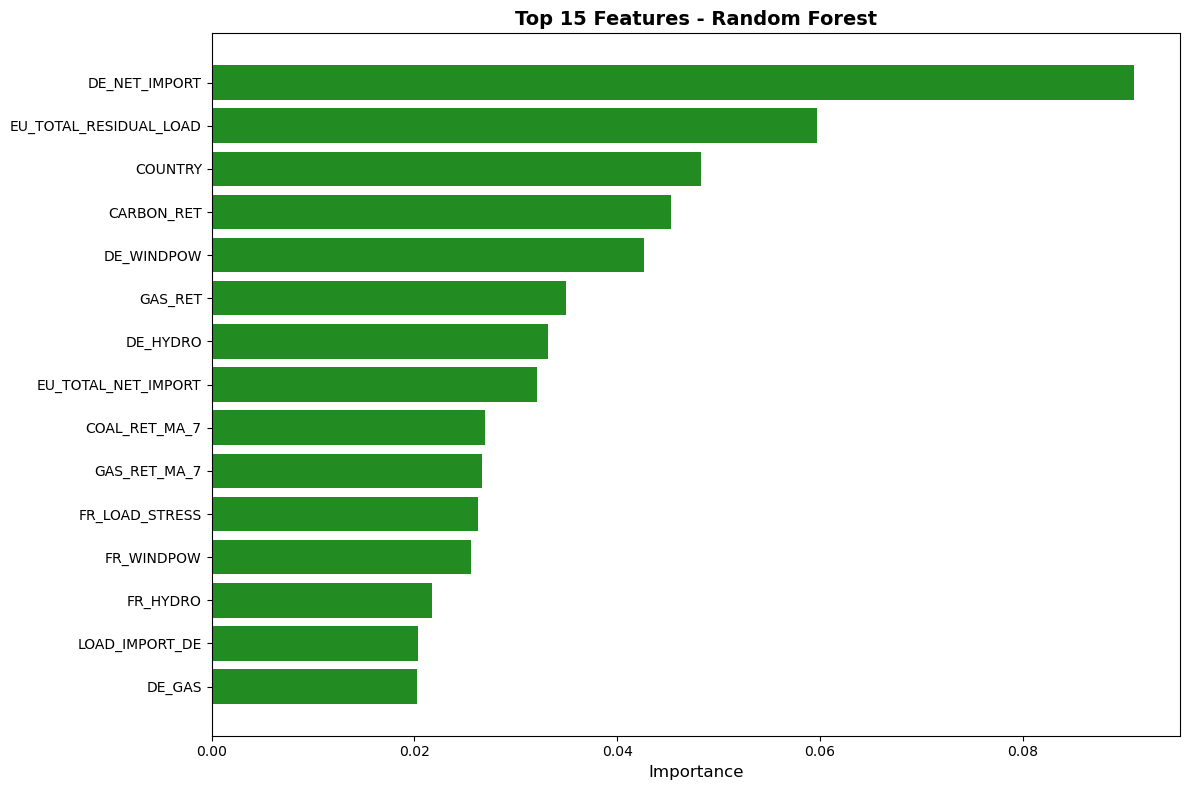

In [56]:
# Feature importance pour Random Forest

importances = pd.Series(best_rf.feature_importances_, index=X_tr.columns)\
               .sort_values(ascending=False)


# Graphique harmonisé
top_15_rf = importances.head(15).sort_values()
plt.figure(figsize=(12, 8))
plt.barh(range(15), top_15_rf.values, color='forestgreen')
plt.yticks(range(15), top_15_rf.index)
plt.xlabel('Importance', fontsize=12)
plt.title('Top 15 Features - Random Forest', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [58]:
# Création fichier soumission avec Random Forest
import shutil

Y_test_submission_rf = X_test[['ID']].copy()
X_test_clean = X_test.drop(columns=["ID", "DAY_ID"], errors="ignore")
Y_test_submission_rf['TARGET'] = best_rf.predict(X_test_clean)
Y_test_submission_rf.to_csv('benchmark_rf.csv', index=False)   

shutil.move('benchmark_rf.csv', '../data/benchmark_rf.csv')

'../data/benchmark_rf.csv'

## 4. Modèle - Régression Quantile (médiane)

In [59]:
# Le meilleur modèle individuel : Quantile Regression (médiane)
# Optimisé directement sur Spearman via GridSearchCV

from sklearn.linear_model import QuantileRegressor

alphas = np.logspace(-4, 1, 20)

model = QuantileRegressor(
    quantile=0.5,      # Médiane - robuste aux outliers
    solver="highs"
)

param_grid = {
    "alpha": alphas
}

tscv = TimeSeriesSplit(n_splits=5)

search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring=spearman_score,
    cv=tscv,
    n_jobs=-1
)

search.fit(X_tr, y_tr)

best_quantile_model = search.best_estimator_

y_val_pred_q = best_quantile_model.predict(X_val)
spearman_quantile = spearmanr(y_val, y_val_pred_q).correlation

print("Best alpha (CV temporelle):", search.best_params_["alpha"])
print("Best Spearman (CV train):", search.best_score_)
print("Spearman (validation OOS):", spearman_quantile)

/var/folders/nq/qwtx6rd54k7686m_s4y2mxpw0000gn/T/ipykernel_60786/2050432489.py:12: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
/var/folders/nq/qwtx6rd54k7686m_s4y2mxpw0000gn/T/ipykernel_60786/2050432489.py:12: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
/var/folders/nq/qwtx6rd54k7686m_s4y2mxpw0000gn/T/ipykernel_60786/2050432489.py:12: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
/var/folders/nq/qwtx6rd54k7686m_s4y2mxpw0000gn/T/ipykernel_60786/2050432489.py:12: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
/var/folders/nq/qwtx6rd54k7686m_s4y2mxpw0000gn/T/ipykernel_60786/2050432489.py:12: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
/var/folders/nq/qwtx6rd54k7686m_s4y2mxpw0000gn/T/ipykernel_60786/2050432489.py:12: ConstantInputWarning: An input a

Best alpha (CV temporelle): 0.023357214690901212
Best Spearman (CV train): 0.19886996227577575
Spearman (validation OOS): 0.26163195102650405


## 5. Modèle - Quantile Ensemble

In [60]:
# Entrainer plusieurs quantiles et moyenner les prédictions
# Capture toute la distribution → meilleur ranking

from sklearn.linear_model import QuantileRegressor

quantiles = [0.1, 0.25, 0.5, 0.75, 0.9]
predictions_quantiles = []
models_quantiles = []

for q in quantiles:
    qr = QuantileRegressor(quantile=q, alpha=0.01, solver="highs")
    qr.fit(X_tr, y_tr)
    pred = qr.predict(X_val)
    predictions_quantiles.append(pred)
    models_quantiles.append(qr)
    print(f"Quantile {q}: Spearman = {spearmanr(y_val, pred).correlation:.4f}")

# Moyenne pondérée (plus de poids sur la médiane)
weights = [0.1, 0.2, 0.4, 0.2, 0.1]
y_pred_ensemble = np.average(predictions_quantiles, axis=0, weights=weights)

spearman_ensemble = spearmanr(y_val, y_pred_ensemble).correlation
print(f"\nEnsemble Quantiles - Spearman: {spearman_ensemble:.4f}")

Quantile 0.1: Spearman = 0.1922
Quantile 0.25: Spearman = 0.2179
Quantile 0.5: Spearman = 0.2502
Quantile 0.75: Spearman = 0.1520
Quantile 0.9: Spearman = 0.1392

Ensemble Quantiles - Spearman: 0.2275
Quantile 0.75: Spearman = 0.1520
Quantile 0.9: Spearman = 0.1392

Ensemble Quantiles - Spearman: 0.2275


## 6. Modèle - LightGBM avec MAE 

In [61]:
# LightGBM avec objectif MAE standard
# Simple, efficace, et bon score Spearman

import lightgbm as lgb

params_mae = {
    'objective': 'mae',
    'metric': 'mae',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'max_depth': 7,
    'verbose': -1
}

lgb_train = lgb.Dataset(X_tr, y_tr)
lgb_val = lgb.Dataset(X_val, y_val, reference=lgb_train)

lgb_model = lgb.train(
    params_mae,
    lgb_train,
    num_boost_round=500,
    valid_sets=[lgb_train, lgb_val],
    callbacks=[lgb.early_stopping(50), lgb.log_evaluation(50)]
)

y_pred_lgb = lgb_model.predict(X_val)
spearman_lgb = spearmanr(y_val, y_pred_lgb).correlation
print(f"\nLightGBM MAE - Spearman validation: {spearman_lgb:.4f}")

Training until validation scores don't improve for 50 rounds
[50]	training's l1: 0.48246	valid_1's l1: 0.55423
Early stopping, best iteration is:
[39]	training's l1: 0.491679	valid_1's l1: 0.552815

LightGBM MAE - Spearman validation: 0.1827
Early stopping, best iteration is:
[39]	training's l1: 0.491679	valid_1's l1: 0.552815

LightGBM MAE - Spearman validation: 0.1827
